# Tissue type classification based on microarray gene expression profiles

## Introduction

In recently years, the explosion of data-driven methods in medical sciences have increased dramatically. For example, gene expression data has been used to help the understanding of cancer and cellular responses to drug treatment. Data obtained from cancer related gene expression studies typically consists of expression level measurements of thousands of genes. This amount of data calls for methodologies that efficiently extract relevant biological information. 

Previous gene expression analysis work emphasizes clustering techniques, which aim at partitioning the set of genes into subsets that are expressed similarly across different conditions. Indeed, clustering methods, have helped to identify functionally related families of genes. However, these methods limited the usage of any tissue annotation (e.g., tumor vs. normal) in the partitioning step. 

In this study, our aim is to predict the classification of new tissues, based on their gene expression profiles after training on examples that have been classified by an external “supervisor”. For such purpose, propose two classification methods: i) Logistic regression and ii)  Support Vector Machines** SVM (Cortes \& Vapnik 1995, Vapnik 1999) classifier.

For this study, we use a sample of the microarray data consisting of normalized relative expression of certain genes measured in different tissue. A microarray is a laboratory tool used to detect the expression of thousands of genes at the same time. DNA microarrays are microscope slides that are printed with thousands of tiny spots in defined positions, with each spot containing a known DNA sequence or gene.

<img src="DNA_microarray.jpg" width=800/>

image source: https://www.genome.gov/about-genomics/fact-sheets/DNA-Microarray-Technology


The full dataset can be found at https://www.ebi.ac.uk/arrayexpress/ (accession number E-MTAB-62). 
Thus, the data we are going to use consists of pairs $\langle x_i, l_i \rangle$, for $i = 1, \dots, m$ in which $x_i$ is a vector in $\mathbb{R}^m$ that describes expression values of genes/clones. The labels $l_i$ associated with $x_i$ are $\{'disease',\, 'normal' \}$ 
 
In order to determine the best method for the given data, we will provide a criterion for grading the performance of each method. For this case, we compute the Accuracy, Precision, Recall & F1 Score measures, where
\begin{eqnarray}
Accuracy & = & \frac{True \, Positive + True\, Negatives }{True \, Positive +False\,positve +False\, Negative + True\, Negative}\\[5mm] 
Precision & = & \frac{True \, Positive }{True \, Positive +False \, Positve} \\[5mm] 
Recall & = & \frac{True \, Positive }{True \, Positive +False \, Negative} \\[5mm] 
F1\, Score & = & 2 \frac{(Recall * Precision)}{Recall + Precision}\\
\end{eqnarray}

Moreover, we will provide as well training errors in both classifiers defined as 
\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2.
\end{equation}


Ultimately, our goal is to build logistic regression and Support Vector Machine (SVM) models for solving tissue type prediction task.

## Methods
### Dataset.
The dataset used in this study consist of a sample of the normalized relative expression of certain genes measured in different tissue. The full dataset can be found at https://www.ebi.ac.uk/arrayexpress/ (accession number E-MTAB-62). This sample is pre-processed by filtering 'disease' and 'normal' tissues. The resulting feature matrix $X \in \mathbb{R}^n_m$ where $n= 700$ and $m = 3000$. $y \in \mathbb{R}^n$ is a vector containing integer values 1 (for data points labled as "disease") and 0 (for data points labled as 'normal').   


### Training a validating sets

Typically, the scheme for validating the predictive performance of a ML model is to split the available data into two set for training the model, and  validating the performance of the trained model. The dataset used for training is referred to as the training set, and the data used for validation is referred to as the validation set. In this study the spliting ratio is 80:20.


### Pre-processing

The data is pre-processed to remove the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. In addtion, a principal component decomposition is performed to reduce the dimensionality of the dataset used and increasing interpretability while minimizing information loss. 


### Classifiers

- A description of the model(s) you are using to solve your machine learning problem. Of what form are the predictor functions (include formula if applicable)? What is the loss function to be minimized or maximized (include formula if applicable). You should also include a short description of the hyperparameters that you tune to optimize the model.

#### Logistic Regression
Logistic Regression is a popular statistical model used for binary classification. Logistic regression is a **probabilistic model**. The fundamental assumption of (binary) logistic regression is that the [log-odds](https://www.statisticshowto.com/log-odds/) of a data point $\mathbf{x}$ having label $y=1$ are linearly related to the features of the data point:


\begin{equation}
\log \frac{P(y=1)}{P(y=0)} = \log \frac{P(y=1)}{1-P(y=1)} = w_0 + \mathbf{w}^T \mathbf{x} = w_0 + \sum_{i=1}^n w_i x_i.
\tag{3}
\end{equation}

Here, the coefficient vector $\mathbf{w} = \big(w_1, w_2, \ldots, w_n \big)^T$ and intercept $w_0$ fully define the linear relationship between the features and the log-odds.

Note that $w_0 + \mathbf{w}^T\mathbf{x} > 0$ when the data point is more likely to have the label $y=1$, and $w_0 + \mathbf{w}^T\mathbf{x} < 0$ when it is more likely that the label $y=0$. Therefore, the sign of the function $h(\mathbf{x}) = w_0 + \mathbf{w}^T \mathbf{x}$ can be used to predict the label $y$ of data points. The predicted labels outputted by the logistic regression model are

\begin{equation}
 \hat{y} = \begin{cases} 1 & \mbox{ for } w_0 + \mathbf{w}^T\mathbf{x} \geq 0 \\ 0 & \mbox{ for } w_0 + \mathbf{w}^T\mathbf{x} < 0 \end{cases}.
 \tag{4}
\end{equation}

Given the model parameters, one can calculate the estimated probabilities of the data point $\mathbf{x}$ belonging to each class. To calculate the probability of the data point having the label $y=1$ we solve for $P(y=1)$ in equation (3) to obtain

\begin{equation}
P(y=1) = \frac{1}{1 + \exp(-w_0 -\mathbf{w}^T \mathbf{x})}.
\tag{5}
\end{equation}

Since the label can only take the values 0 and 1, we obtain $P(y=0)$ as the probability of the complement of $P(y=1)$:

\begin{equation}
P(y=0) = 1 - P(y=1) = 1 - \frac{1}{1 + \exp(-w_0 -\mathbf{w}^T \mathbf{x})} = \frac{1}{1 + \exp(w_0 + \mathbf{w}^T \mathbf{x})}
\tag{6}
\end{equation}.
A logistic regression model is fitted by minimizing the average **logistic loss**

\begin{equation}
\begin{aligned}
\mathcal{E}(\mathbf{w}) &=(1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(P(y=1)\big)-(1-y^{(i)})\ln\big(P(y=0)\big) \big] \\ &= (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big]
\end{aligned}
\end{equation}

with respect to $\mathbf{w}$ and $w_0$. Here, the **logistic loss** of a single data point $\mathbf{x}^{(i)}$ with label $y^{(i)}$ is 

\begin{equation}
    \mathcal{L}(\mathbf{x}^{(i)},y^{(i)}) = -y^{(i)} \ln \big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big),
\end{equation}

where $\sigma(\mathbf{z})$ is the **sigmoid function**

\begin{equation}
\sigma(\mathbf{z}) = \frac{1}{1 + \exp{(\mathbf{-z})}}.
\end{equation}



#### Support Vector Machine

Support Vector Machine is a linear model for classification and regression problems. Given it's robustness and flexibility, SVM classifiers can solve linear and non-linear problems. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. For further, details we refer to the original paper Cortes & Vapnik 1995, Vapnik 1999).

## Results

In [15]:
### PART 1 ###
## Processing DATA ##

import pandas as pd
import numpy as np


# Read in data from the csv file and store it in the data frame 'df'.
df = pd.read_csv("./data/data_subset.csv")


# Selecting Dataframe rows on multiple conditions using loc

#In this part, you will only use data points belonging to two of the four categories in the dataset
# 'disease' and 'normal'. Consequently, you should create a new data frame that only contains the 
# data points with these labels. The new dataset should consist of 700 data points.

df_two_of_the_four_categories = df.loc[(df['label'] == 'disease') | (df['label'] == 'normal')]

# Check dimensions

print(df_two_of_the_four_categories.shape)


# Create numpy arrays X (feature matrix) and y (label vector) based on the data frame. 
# The feature matrix should contain the expression data and be of shape (700, 3000). 
# The label vector y should be of shape=(700,) and contain integer values 1 
#(for data points labled as "disease") and 0 (for data points labled as 'normal').


X = df_two_of_the_four_categories.iloc[:,3:-1].to_numpy()

y = np.zeros(700,)

for i in range(len(y)):
    if df_two_of_the_four_categories.iloc[i, -1] == 'disease':
        y[i]=1     


(700, 3004)


Training error:  0.2892857142857143


F1 score:  0.6379168778310762


              precision    recall  f1-score   support

     disease       0.73      0.68      0.70        80
      normal       0.61      0.67      0.63        60

    accuracy                           0.67       140
   macro avg       0.67      0.67      0.67       140
weighted avg       0.68      0.67      0.67       140



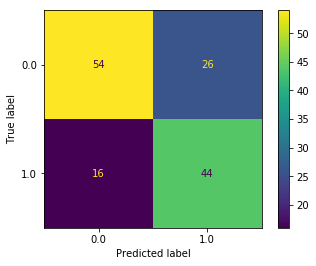

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, cross_val_score
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
# Set random seed for reproducibility
np.random.seed(0)

K = 5
kf = KFold(n_splits=K, shuffle=False)

# Split the data with train_test_split into training and test sets (with 80:20 ratio, random_state=42). 
# Keep test set aside until final evaluation. Use training data to choose the model.

# Split dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)


# Implement PCA (using 20 components) with logistic regression:

# Use Pipeline sklearn class to chain pre-processing steps 
# (StandardScaler() and PCA(n_components=20, random_state=42)) and logistic regression.


n=20

scaler = StandardScaler()

log_reg = LogisticRegression()

classifier = Pipeline([('scaler', StandardScaler()),('pca',  PCA(n_components = n, random_state=42)),('log_reg', LogisticRegression(n_jobs=1, C=1e6, solver='lbfgs',multi_class='ovr',random_state=42, class_weight='balanced', max_iter=1e6))])

# Fit the classifier using the training data
classifier.fit(X_train, y_train)

# Predict y using the trained classifier and the training data
y_train_pred = classifier.predict(X_train)


# Predict using the trained classifier and the test data
y_pred = cross_val_predict(classifier, X_test, y_test, cv = kf)

# Use cross_val_score class from sklearn.model_selection to perform 5-fold cross-validation 
# and get average F1-score (use parameters scoring='f1' and cv=5 in cross_val_score object).

scores = cross_val_score(classifier, X_test, y_test, cv = kf, scoring='f1')

print('Training error: ', mean_squared_error(y_train, y_train_pred))
print('\n')
print('F1 score: ', sum(scores)/K)
print('\n')
print(classification_report(y_test, y_pred, target_names=['disease', 'normal']))

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show() 

In [17]:
# Part 2 

# Implement PCA (using 20 components) with SVM:

# Construct Pipeline object with scaler and PCA for SVM model in a similar way as for logistic regression.
# Use training set for choosing parameters and hyperparameters. 
#Specifically, perform grid search combined with cross-validation on the Pipeline object by using the GridSearchCV class in scikit-learn.


from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

n = 20
classifier_2 = Pipeline([
        ('scale', StandardScaler()),
        ('PCA', PCA(n_components=n)),
        ('clf', SVC())])

# The candidate parameter values for the SVM model in your grid search should be 'C': [0.01, 1, 100] 
# and 'gamma': [1e-04, 1e-03, 1e-02]}, the number of folds used for cross-validation should be cv=5, 
# and scoring parameter f1.


param_grid = dict(clf__C = [0.01, 1, 100] ,
                  clf__gamma = [1e-04, 1e-03, 1e-02],
                  clf__kernel=['rbf','linear'])

grid = GridSearchCV(classifier_2, param_grid=param_grid, cv=5, n_jobs=1, scoring= 'accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=20, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_...
        

Training error:  0.19285714285714287


Best score:  0.8071428571428572


              precision    recall  f1-score   support

     disease       0.84      0.81      0.83        80
      normal       0.76      0.80      0.78        60

    accuracy                           0.81       140
   macro avg       0.80      0.81      0.80       140
weighted avg       0.81      0.81      0.81       140



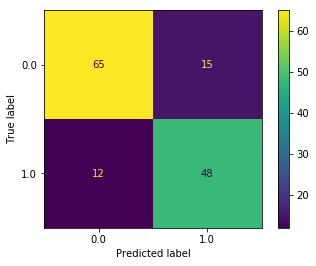

In [18]:
# Report F1-score of SVM model with best parameter values for C and gamma.

best_model = grid.best_estimator_
best_model_score=best_model.score(X_test, y_test)

y_test_pred = best_model.predict(X_test)

#print(best_model)
print('Training error: ', mean_squared_error(y_test, y_test_pred))
print('\n')
print('Best score: ', best_model_score)
print('\n')
print(classification_report(y_test, y_test_pred, target_names=['disease', 'normal']))

plot_confusion_matrix(best_model, X_test, y_test) 
plt.show() 

### Discussion / Conclusion

In this study, the tissue classification based on expression data was approached. In this approach, two classification methods were implemented to  classify  the microarray data consisting of normalized relative expression of certain genes measured in different tissue. The original data was preprocessed following the protocol presented in the methods section. The classification methods used in this study were logistic regression and supported vector machine.

For assessing the performance of the choicen methods, we conducted a 5-fold Cross-validation. A Cross-validation is a statistical method used to estimate the skill of machine learning models. For determining the performance, we computed the Accuracy, Precision, Recall & F1 Score measures. (This scores are presented in the sections above).

For the reported scores, we conclude that the SVM classifier behaves better given the data. This means that 80% of accuracy in contrast to 60% of the logistic regression. 

To conclude, we note that the appoaches in this study are rather simplistic and further refinement the classification can be made. For example, the SVM classifer used in this implementation uses a linear kernel in a addition to a more exhaustive grid search. As for the logistic regression method, these options should be also considered. 

## To be continue to the 4. classes problem